## Bike Sharing

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


In [452]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [453]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading and cleaning data


In [454]:
#load data
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [455]:
data.shape

(730, 16)

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [457]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [458]:
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [459]:
#mapping variables value to real values
data[['season']] = data[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

data[['mnth']] = data[['mnth']].apply(lambda x : x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))

data[['weekday']] = data[['weekday']].apply(lambda x : x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat'}))

data[['weathersit']] = data[['weathersit']].apply(lambda x : x.map({1:'Clear_Few_clouds', 2:'Mist_Cloudy', 3:'Light_Snow_Rain', 4:'Heavy_Rain_Snow'}))

In [460]:
#add a derived column of day from dteday
d, m, y = data['dteday'].str.split('-').str
data['day'] = pd.to_numeric(d)

In [461]:
#dropping dteday becasue there is day.month and year of the each date
data = data.drop('dteday', 1)

#since instant is unique id of each row, dropping that column
data = data.drop('instant', 1)

#cnt is the sum of casual and registered user. so dropping these columns too
data = data.drop(['casual','registered'], 1)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,jan,0,mon,1,Clear_Few_clouds,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,jan,0,tue,1,Clear_Few_clouds,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,jan,0,wed,1,Clear_Few_clouds,9.305237,11.46350,43.6957,12.522300,1600,5


## Step 1 : Data Visualization

<AxesSubplot:xlabel='cnt', ylabel='Density'>

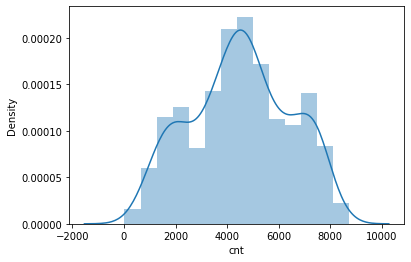

In [462]:
#count distribution
sns.distplot(data.cnt)

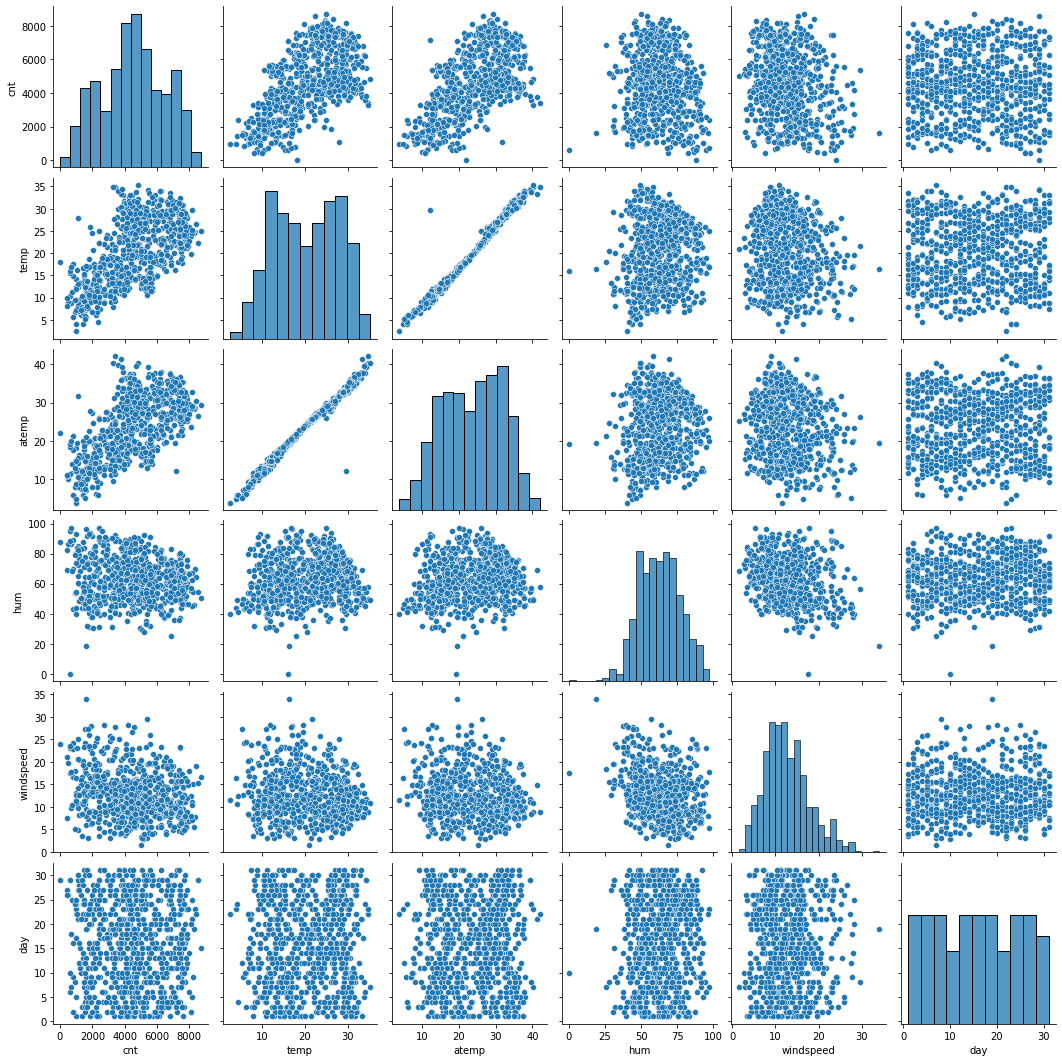

In [463]:
sns.pairplot(data,x_vars = ["cnt","temp","atemp","hum","windspeed","day"], y_vars=["cnt","temp","atemp","hum","windspeed","day"] )
plt.show()

In [464]:
#dropping day because it has no linear relationship with cnt
data = data.drop('day', 1)


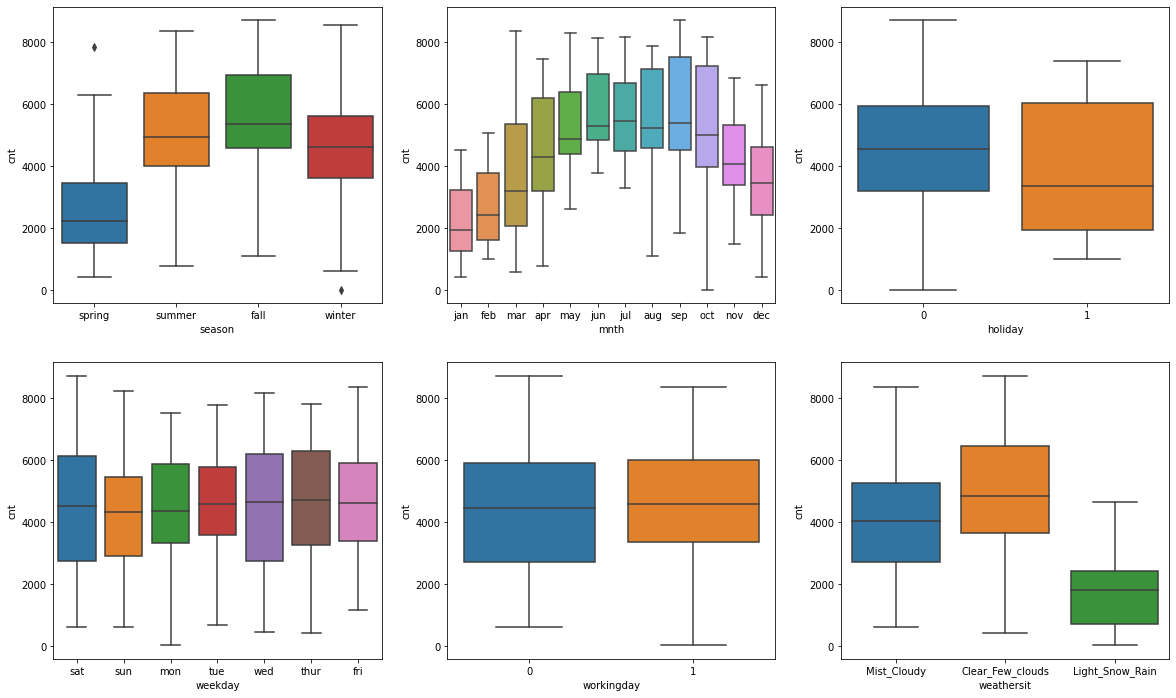

In [465]:
#### Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

### -  Correlation between Variables 

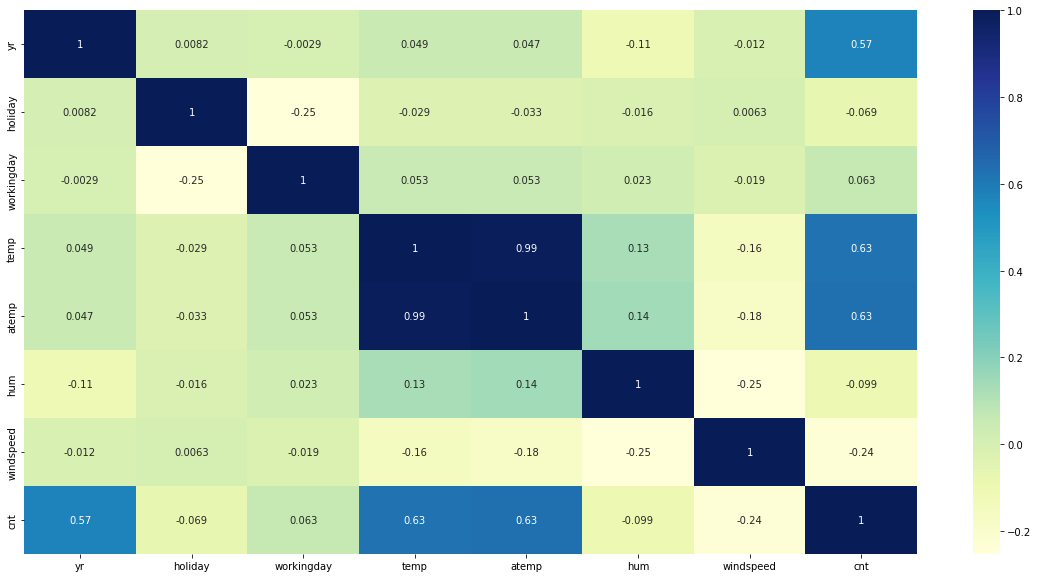

In [466]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Here`atemp` seems to the correlated to `cnt` the most.
- Here `atemp` and `temp` are highly correlated. so its better to drop on of the variable


In [467]:
#since atemp and temp highly correlated, dropping temp variable
data = data.drop('atemp', 1)


## Step 2 : Data Preparation


### -  Dummy Variables preparation

converting season , weathersit, weekday to dummy variables

In [468]:
#dummay variables of season
seasons = pd.get_dummies(data['season'])

In [469]:
seasons.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

Here, we don't need three columns. so dropping fall column, as the type of fall can be identified with just the last two columns where — 
- `000` will correspond to `fall`
- `010` will correspond to `summer`
- `100` will correspond to `spring`
- `001` will correspond to `winter`

In [470]:
# so dropping the first column from seasons data using 'drop_first = True'

seasons = pd.get_dummies(data['season'], drop_first = True)

In [471]:
#then concatinate the dummy variables to data

data = pd.concat([data, seasons], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,Clear_Few_clouds,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,Clear_Few_clouds,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,Clear_Few_clouds,9.305237,43.6957,12.522300,1600,1,0,0


In [472]:
#apply the same for weekday,weathersit and mnth

#weekday
weekdays = pd.get_dummies(data['weekday'], drop_first = True)
data = pd.concat([data, weekdays], axis = 1)

#mnth
months = pd.get_dummies(data['mnth'], drop_first = True)
data = pd.concat([data, months], axis = 1)

#weathersit
weathersits = pd.get_dummies(data['weathersit'], drop_first = True)
data = pd.concat([data, weathersits], axis = 1)

In [473]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,jan,jul,jun,mar,may,nov,oct,sep,Light_Snow_Rain,Mist_Cloudy
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,1,0,0,0,0,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear_Few_clouds,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear_Few_clouds,8.200000,59.0435,10.739832,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,Clear_Few_clouds,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,0,0,0


In [474]:
# Dropping 'season','mnth','weekday' and 'weathersit' as we have created the dummies for it

data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,Light_Snow_Rain,Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### - Dividing the data to train & Test


In [475]:
# splitting the data to train and test in respective ratio 8:2
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

### - Scaling

Some features are in diff scales , eg: windspeed,temp,atemp. So bringing all features under same scale for better interpretation.
 - Using MinMax scaling

In [476]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [477]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,Light_Snow_Rain,Mist_Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,...,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,...,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### - Dividing data into dependent & Independent variables.

In [478]:
y_train = data_train.pop('cnt')
X_train = data_train

## Step 3 : Data Modelling & Evaluation

In [479]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [480]:
# summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           6.57e-71
Time:                        16:15:55   Log-Likelihood:                -5095.7
No. Observations:                 584   AIC:                         1.020e+04
Df Residuals:                     582   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1477.2069    159.850      9.241      0.0

### - RFE
Recursive feature elimination

In [481]:
# Using RFE method to identify top 15 params
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [482]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thur', False, 12),
 ('tue', False, 7),
 ('wed', False, 13),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', False, 2),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [483]:
#top 15 params
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'sat', 'dec', 'jan', 'jul', 'nov', 'Light_Snow_Rain',
       'Mist_Cloudy'],
      dtype='object')

In [484]:
X_train.columns[~rfe.support_]

Index(['summer', 'mon', 'sun', 'thur', 'tue', 'wed', 'aug', 'feb', 'jun',
       'mar', 'may', 'oct', 'sep'],
      dtype='object')

### - Building model using statsmodel, for the detailed statistics

In [485]:
#selecting columns basis of RFE method
X_train_rfe = X_train[col]

In [486]:
X_train_rfe = sm.add_constant(X_train_rfe)

#  linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   

In [487]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.02e-223
Time:                        16:15:56   Log-Likelihood:                -4698.6
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     568   BIC:                             9499.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2764.7182    268.565     10.294      0.000    2237.216    3292.221
yr               1989.7071     64.441     30.876      0.000    1863.136    2116.279
holiday          -378.9136    209.831     -1.806      0.071    -791.054      33.227
workingday        442.9934     90.041      4.920      0.000     266.139     619.848
temp             3874.8238    265.501     14.594      0.000    3353.341    4396.306
hum             -1125.7981    306.637     -3.671      0.000   -1728.080    -523.517
windspeed       -1597.3579    205.755     -7.763      0.000   -2001.492   -1193.224
spring           -960.7205    123.166     -7.800      0.000   -1202.637    -718.804
winter            710.0387    108.281      6.557      0.000     497.359     922.718
sat               532.8479    115.377      4.618      0.000     306.231     759.465
dec              -525.0096    133.356     -3.937      0.000    -786.941    -263.078
jan              -434.2679    142.083     -3.056      0.002    -713.340    -155.195
jul              -683.7286    135.918     -5.030      0.000    -950.693    -416.764
nov              -598.3033    148.053     -4.041      0.000    -889.101    -307.506
Light_Snow_Rain -2289.8562    217.377    -10.534      0.000   -2716.816   -1862.896
Mist_Cloudy      -518.8941     84.581     -6.135      0.000    -685.023    -352.765
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
def VIFCalculation(df_data):
    vif = pd.DataFrame()
    vif['Features'] = df_data.columns
    vif['VIF'] = [variance_inflation_factor(df_data.values, i) for i in range(df_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [489]:
# calculate VIF

VIFCalculation(X_train_rfe)

,Features,VIF
0,const,71.88
4,temp,3.56
7,spring,2.85
8,winter,2.19
5,hum,1.95
3,workingday,1.79
9,sat,1.70
13,nov,1.62
15,Mist_Cloudy,1.61
11,jan,1.60


### Dropping the variable and updating the model

In [490]:
#dropping holiday becasue it has high p-value
X_train_rfe = X_train_rfe.drop('holiday', 1,)

In [491]:
#  linear model
lm_final = sm.OLS(y_train,X_train_rfe).fit()   

In [492]:
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.59e-224
Time:                        16:15:56   Log-Likelihood:                -4700.3
No. Observations:                 584   AIC:                             9431.
Df Residuals:                     569   BIC:                             9496.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2725.2707    268.207     10.161      0.000    2198.474    3252.067
yr               1988.0103     64.562     30.792      0.000    1861.202    2114.819
workingday        498.8904     84.721      5.889      0.000     332.486     665.295
temp             3850.8158    265.694     14.493      0.000    3328.956    4372.676
hum             -1114.8290    307.186     -3.629      0.000   -1718.185    -511.473
windspeed       -1605.0510    206.119     -7.787      0.000   -2009.899   -1200.203
spring           -973.1360    123.218     -7.898      0.000   -1215.154    -731.118
winter            710.4383    108.495      6.548      0.000     497.338     923.538
sat               588.9766    111.331      5.290      0.000     370.306     807.647
dec              -538.5695    133.409     -4.037      0.000    -800.604    -276.535
jan              -446.3308    142.208     -3.139      0.002    -725.647    -167.015
jul              -680.3817    136.176     -4.996      0.000    -947.850    -412.913
nov              -627.3672    147.467     -4.254      0.000    -917.014    -337.720
Light_Snow_Rain -2289.7602    217.808    -10.513      0.000   -2717.566   -1861.954
Mist_Cloudy      -519.6700     84.747     -6.132      0.000    -686.126    -353.214
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
#dropping jan because it has highest p-value 
X_train_rfe = X_train_rfe.drop(['jan'], 1,)
#creating new updated model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.36e-223
Time:                        16:15:56   Log-Likelihood:                -4705.3
No. Observations:                 584   AIC:                             9439.
Df Residuals:                     570   BIC:                             9500.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2589.0045    266.716      9.707      0.000    2065.138    3112.871
yr               1978.1973     64.985     30.441      0.000    1850.558    2105.836
workingday        497.3867     85.375      5.826      0.000     329.698     665.075
temp             4100.1391    255.501     16.047      0.000    3598.300    4601.978
hum             -1184.8761    308.743     -3.838      0.000   -1791.290    -578.463
windspeed       -1547.7234    206.896     -7.481      0.000   -1954.096   -1141.351
spring          -1055.0947    121.351     -8.695      0.000   -1293.444    -816.746
winter            724.7609    109.238      6.635      0.000     510.204     939.318
sat               585.5506    112.187      5.219      0.000     365.200     805.901
dec              -431.7956    129.996     -3.322      0.001    -687.125    -176.466
jul              -726.4945    136.428     -5.325      0.000    -994.457    -458.532
nov              -574.0599    147.619     -3.889      0.000    -864.003    -284.116
Light_Snow_Rain -2239.1959    218.891    -10.230      0.000   -2669.128   -1809.264
Mist_Cloudy      -512.1791     85.369     -6.000      0.000    -679.855    -344.503
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.859
Skew:                          -0.772   Prob(JB):                     5.62e-60
Kurtosis:                       5.971   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
#dropping dec because it has highest p-value 
X_train_rfe = X_train_rfe.drop(['dec'], 1,)
#creating new updated model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.55e-222
Time:                        16:15:56   Log-Likelihood:                -4710.9
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     571   BIC:                             9505.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2492.5871    267.451      9.320      0.000    1967.279    3017.895
yr               1971.9842     65.526     30.095      0.000    1843.283    2100.686
workingday        494.5442     86.118      5.743      0.000     325.398     663.690
temp             4310.7684    249.672     17.266      0.000    3820.380    4801.156
hum             -1270.3368    310.361     -4.093      0.000   -1879.925    -660.749
windspeed       -1517.0205    208.498     -7.276      0.000   -1926.537   -1107.504
spring          -1035.6243    122.269     -8.470      0.000   -1275.777    -795.472
winter            623.3735    105.804      5.892      0.000     415.561     831.186
sat               577.8803    113.144      5.107      0.000     355.650     800.110
jul              -764.2513    137.143     -5.573      0.000   -1033.617    -494.886
nov              -414.8706    140.844     -2.946      0.003    -691.506    -138.235
Light_Snow_Rain -2200.9501    220.500     -9.982      0.000   -2634.041   -1767.859
Mist_Cloudy      -492.0628     85.899     -5.728      0.000    -660.779    -323.347
==============================================================================
Omnibus:                       82.214   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.593
Skew:                          -0.714   Prob(JB):                     1.53e-47
Kurtosis:                       5.611   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [495]:
#dropping nov because it has highest p-value 
X_train_rfe = X_train_rfe.drop(['nov'], 1,)
#creating new updated model
lm_final = sm.OLS(y_train,X_train_rfe).fit()   
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     278.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.23e-221
Time:                        16:15:56   Log-Likelihood:                -4715.3
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     572   BIC:                             9507.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2390.6331    266.976      8.954      0.000    1866.261    2915.006
yr               1974.1214     65.960     29.929      0.000    1844.567    2103.675
workingday        506.2515     86.601      5.846      0.000     336.156     676.347
temp             4419.0015    248.605     17.775      0.000    3930.711    4907.292
hum             -1236.0255    312.216     -3.959      0.000   -1849.256    -622.795
windspeed       -1541.7655    209.722     -7.351      0.000   -1953.684   -1129.847
spring           -990.4940    122.117     -8.111      0.000   -1230.346    -750.642
winter            511.2937     99.385      5.145      0.000     316.089     706.499
sat               594.9689    113.751      5.230      0.000     371.548     818.390
jul              -782.7588    137.915     -5.676      0.000   -1053.640    -511.878
Light_Snow_Rain -2185.2487    221.910     -9.847      0.000   -2621.107   -1749.390
Mist_Cloudy      -485.7775     86.446     -5.619      0.000    -655.569    -315.986
==============================================================================
Omnibus:                       82.547   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.451
Skew:                          -0.719   Prob(JB):                     1.64e-47
Kurtosis:                       5.605   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
# calculate VIF

VIFCalculation(X_train_rfe)

,Features,VIF
0,const,67.56
3,temp,2.97
6,spring,2.66
4,hum,1.92
7,winter,1.76
11,Mist_Cloudy,1.59
2,workingday,1.58
8,sat,1.57
9,jul,1.26
10,Light_Snow_Rain,1.24


 - Now all the P-values are under .05 and VIF<5

## Residual Analysis of the train data

In [497]:
X_train_rfe

,const,yr,workingday,temp,hum,windspeed,spring,winter,sat,jul,Light_Snow_Rain,Mist_Cloudy
367,1.0,1,1,0.113228,0.454701,0.695175,1,0,0,0,0,0
648,1.0,1,1,0.468352,0.477458,0.299450,0,1,0,0,0,0
44,1.0,0,1,0.443431,0.387290,0.807474,1,0,0,0,0,0
705,1.0,1,1,0.326094,0.787463,0.189819,0,1,0,0,0,1
379,1.0,1,0,0.133996,0.431945,0.449210,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,1,0,0,1
79,1.0,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,1


### 1 - Normal distribution of error terms

In [498]:
#predicted y_train count
y_train_count = lm_final.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

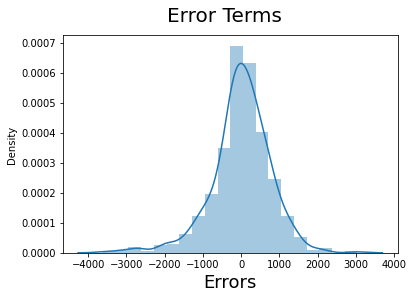

In [499]:
# Histogram plot of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- Erros are normally distributed

### 2 - No Multicollinearity

In [500]:
# calculate VIF

VIFCalculation(X_train_rfe)

,Features,VIF
0,const,67.56
3,temp,2.97
6,spring,2.66
4,hum,1.92
7,winter,1.76
11,Mist_Cloudy,1.59
2,workingday,1.58
8,sat,1.57
9,jul,1.26
10,Light_Snow_Rain,1.24


- VIF of all the variables are less than 5 ie variables are independent each other

### 3 - Homoscedasticity

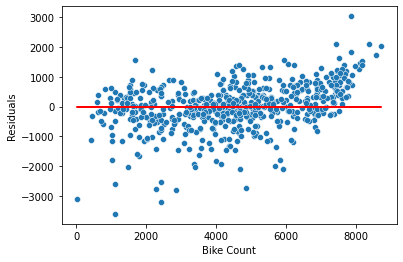

In [501]:
y_train_pred = lm_final.predict(X_train_rfe)
residuals = y_train - y_train_pred
sns.scatterplot(y_train,residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Bike Count')
plt.ylabel('Residuals')
plt.show()

- Residuals are not showing any visible patterns

### 4 - Linear Regression 

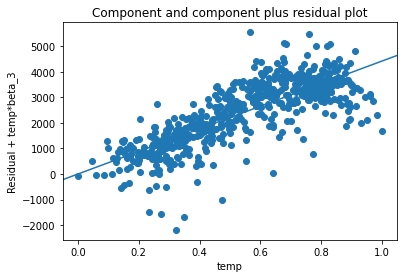

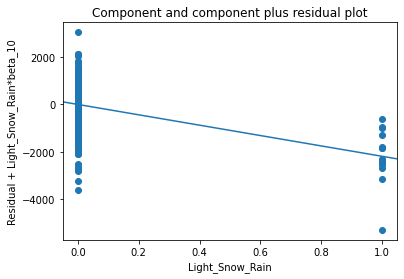

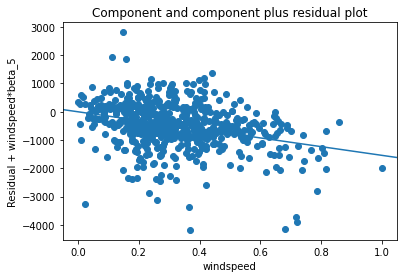

In [502]:
# checking linear relationship by CCPR plot

sm.graphics.plot_ccpr(lm_final, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_final, 'Light_Snow_Rain')
plt.show()

sm.graphics.plot_ccpr(lm_final, 'windspeed')
plt.show()


- There is a visible line of linearity

### 5 - No auto-correlation or independence 

In [503]:
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     278.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.23e-221
Time:                        16:15:57   Log-Likelihood:                -4715.3
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     572   BIC:                             9507.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2390.6331    266.976      8.954      0.000    1866.261    2915.006
yr               1974.1214     65.960     29.929      0.000    1844.567    2103.675
workingday        506.2515     86.601      5.846      0.000     336.156     676.347
temp             4419.0015    248.605     17.775      0.000    3930.711    4907.292
hum             -1236.0255    312.216     -3.959      0.000   -1849.256    -622.795
windspeed       -1541.7655    209.722     -7.351      0.000   -1953.684   -1129.847
spring           -990.4940    122.117     -8.111      0.000   -1230.346    -750.642
winter            511.2937     99.385      5.145      0.000     316.089     706.499
sat               594.9689    113.751      5.230      0.000     371.548     818.390
jul              -782.7588    137.915     -5.676      0.000   -1053.640    -511.878
Light_Snow_Rain -2185.2487    221.910     -9.847      0.000   -2621.107   -1749.390
Mist_Cloudy      -485.7775     86.446     -5.619      0.000    -655.569    -315.986
==============================================================================
Omnibus:                       82.547   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.451
Skew:                          -0.719   Prob(JB):                     1.64e-47
Kurtosis:                       5.605   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Since Durbin-Watson value is almost 2, there is no auto-correlation

##  Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [504]:
num_vars = ['temp', 'hum', 'windspeed']

data_test[num_vars] = scaler.fit_transform(data_test[num_vars])

In [505]:
#### Dividing test data into x and y
y_test = data_test.pop('cnt')
X_test = data_test

In [506]:
x_train_columns = X_train_rfe.columns[1:]

# creating new X_test_lm with x_train columns
X_test = X_test[x_train_columns]

X_test_lm = sm.add_constant(X_test)

In [507]:
# making prediction of y_test

y_pred = lm_final.predict(X_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

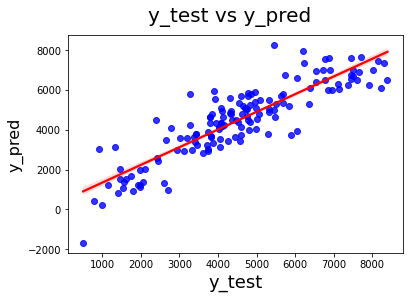

In [508]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                   
plt.ylabel('y_pred', fontsize = 16)      

In [509]:
round(lm_final.params,3)

const              2390.633
yr                 1974.121
workingday          506.251
temp               4419.002
hum               -1236.025
windspeed         -1541.765
spring             -990.494
winter              511.294
sat                 594.969
jul                -782.759
Light_Snow_Rain   -2185.249
Mist_Cloudy        -485.777
dtype: float64

In [515]:
# Calculating R2 value for the test dataset
R2 = r2_score(y_test, y_pred)
round(R2,4)


0.7616

In [517]:
# Calculating The Adjusted-R2 for the test dataset

adjusted_r2 = round(1-(1-R2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.742


- test and train data has a significant r2_score

##### The equation of our best fitted line is:

$ count = 2390.633 + 1974.121  \times  yr + 506.251  \times  workingday + 4419.002 \times temp - 1236.025 \times hum 
    - 1541.765 \times windspeed - 990.494 \times spring + 511.294 \times winter +  594.969 \times sat 
    - 782.759 \times jul  - 2185.249 \times Light Snow Rain -  485.777 \times Mist Cloudy  $

